<a href="https://colab.research.google.com/github/lesyeuxdehillarie/Grant-Cost-Sharing-Prediction-/blob/main/grants.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Project Goal: ​**
## To build a robust Machine Learning model that predicts whether a new grant opportunity will require cost-sharing or matching funds based on its publicly available metadata like its category, funding agency, and award amounts. (True/False).​ where the target variable is the cost_sharing_or_matching_requirement column.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder


df= pd.read_csv('grants.csv')
pd.set_option('display.max_columns', None)
df.head(5)

,Unnamed: 0,opportunity_id,opportunity_title,opportunity_number,opportunity_category,funding_instrument_type,category_of_funding_activity,cfda_numbers,eligible_applicants,eligible_applicants_type,agency_code,agency_name,post_date,close_date,last_updated_date,archive_date,award_ceiling,award_floor,estimated_total_program_funding,expected_number_of_awards,cost_sharing_or_matching_requirement,additional_information_url
0,0,262148,Establishment of the Edmund S. Muskie Graduate...,SCAPPD-14-AW-161-SCA-08152014,Discretionary,Cooperative Agreement,Other,19.040,Others,Non-Government Organization,DOS-SA,Bureau of South and Central Asian Affairs,2014-08-15,2014-09-04,2014-08-20,2014-10-04,600000.0,400000.0,600000.0,1.0,False,NaN
1,1,262308,Health and resiliency of salt marshes in Jamai...,NPS-14-NERO-0119,Discretionary,Cooperative Agreement,Other,15.945,Others,Non-Government Organization,DOI-NPS,National Park Service,2014-08-18,2014-08-23,2014-08-18,2014-08-24,275897.0,275897.0,275897.0,1.0,False,NaN
2,2,262368,Post-Hurricane Sandy submerged marine habitat ...,NPS-14-NERO-0125,Discretionary,Cooperative Agreement,Other,15.945,Others,Non-Government Organization,DOI-NPS,National Park Service,2014-08-19,2014-08-24,2014-08-19,2014-08-25,480000.0,480000.0,480000.0,1.0,False,NaN
3,3,262390,Inventory and Monitoring of Amphibians and Rep...,NPS-14-NERO-0087,Discretionary,Cooperative Agreement,Other,15.945,Others,Non-Government Organization,DOI-NPS,National Park Service,2014-08-19,2014-08-24,2014-08-19,2014-08-25,255577.0,255577.0,255577.0,1.0,False,NaN
4,4,131594,Youth Leadership Program with Algeria,ECA-PE-C-PY-12-09,Discretionary,Cooperative Agreement,Other,19.415,Others,Non-Government Organization,DOS-ECA,Bureau Of Educational and Cultural Affairs,2011-11-21,2012-01-04,2011-11-21,2012-01-05,250000.0,NaN,250000.0,1.0,True,http://exchanges.state.gov/grants/open2.html


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75640 entries, 0 to 75639
Data columns (total 22 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Unnamed: 0                            75640 non-null  int64  
 1   opportunity_id                        75640 non-null  int64  
 2   opportunity_title                     75640 non-null  object 
 3   opportunity_number                    75640 non-null  object 
 4   opportunity_category                  75640 non-null  object 
 5   funding_instrument_type               75640 non-null  object 
 6   category_of_funding_activity          75640 non-null  object 
 7   cfda_numbers                          74815 non-null  float64
 8   eligible_applicants                   75640 non-null  object 
 9   eligible_applicants_type              75640 non-null  object 
 10  agency_code                           75597 non-null  object 
 11  agency_name    

Cleaning tasks:
1. Missing values in cfda_numbers, agency_code, agency_name, close_date,  archive_date, award_ceiling, award_floor, estimated_total_program_funding, expected_number_of_awards, additional_information_url.​
2. Date columns in object data type
3. Drop irrelevant columns
4. Check for duplicates

In [ ]:
duplicate_rows = df.duplicated()
print(duplicate_rows)

duplicate_df = df[df.duplicated()]
print(duplicate_df)

0        False
1        False
2        False
3        False
4        False
         ...  
75635    False
75636    False
75637    False
75638    False
75639    False
Length: 75640, dtype: bool
Empty DataFrame
Columns: [Unnamed: 0, opportunity_id, opportunity_title, opportunity_number, opportunity_category, funding_instrument_type, category_of_funding_activity, cfda_numbers, eligible_applicants, eligible_applicants_type, agency_code, agency_name, post_date, close_date, last_updated_date, archive_date, award_ceiling, award_floor, estimated_total_program_funding, expected_number_of_awards, cost_sharing_or_matching_requirement, additional_information_url]
Index: []


In [ ]:
df.columns

Index(['Unnamed: 0', 'opportunity_id', 'opportunity_title',
       'opportunity_number', 'opportunity_category', 'funding_instrument_type',
       'category_of_funding_activity', 'cfda_numbers', 'eligible_applicants',
       'eligible_applicants_type', 'agency_code', 'agency_name', 'post_date',
       'close_date', 'last_updated_date', 'archive_date', 'award_ceiling',
       'award_floor', 'estimated_total_program_funding',
       'expected_number_of_awards', 'cost_sharing_or_matching_requirement',
       'additional_information_url'],
      dtype='object')

In [ ]:
df=df.drop(columns=['Unnamed: 0', 'opportunity_id', 'opportunity_title',
       'opportunity_number', 'opportunity_category', 'additional_information_url'])

In [ ]:
date_columns = ['post_date', 'close_date', 'last_updated_date', 'archive_date']
for col in date_columns:
    df[col] = pd.to_datetime(df[col], errors='coerce')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75640 entries, 0 to 75639
Data columns (total 16 columns):
 #   Column                                Non-Null Count  Dtype         
---  ------                                --------------  -----         
 0   funding_instrument_type               75640 non-null  object        
 1   category_of_funding_activity          75640 non-null  object        
 2   cfda_numbers                          74815 non-null  float64       
 3   eligible_applicants                   75640 non-null  object        
 4   eligible_applicants_type              75640 non-null  object        
 5   agency_code                           75597 non-null  object        
 6   agency_name                           75596 non-null  object        
 7   post_date                             75640 non-null  datetime64[ns]
 8   close_date                            71628 non-null  datetime64[ns]
 9   last_updated_date                     75640 non-null  datetime64[ns]
 10

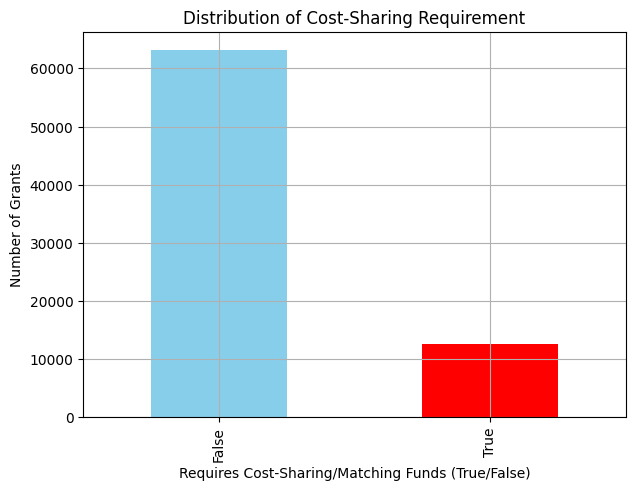

In [ ]:
target_counts = df['cost_sharing_or_matching_requirement'].value_counts()
plt.figure(figsize=(7, 5))
target_counts.plot(kind='bar', color=['skyblue', 'red'])
plt.title('Distribution of Cost-Sharing Requirement')
plt.xlabel('Requires Cost-Sharing/Matching Funds (True/False)')
plt.ylabel('Number of Grants')
plt.grid(True)
plt.show()


Univariate EDA to check for class balance. from observation, the grants that do require cost sharing are way less than the grants that don't require cost sharing. therefore this means that we unfortunately have a very imbalanced class.

In preprocessing, we do some feature engineering which means the creating of a new feature from existing features. We create a new feature opportunity_duration_days from close date and post date to ascertain the relationship between our target variable and the duration. And update_lag_days so we are able to see when the grant was last updated from its posting date.
After forming our new features, we can go ahead and drop the features we derived them from because we dont need them anymore.

In [ ]:
df['opportunity_duration_days'] = (df['close_date'] - df['post_date']).dt.days
df['update_lag_days'] = (df['last_updated_date'] - df['post_date']).dt.days

In [ ]:
df.drop(columns=['post_date', 'close_date', 'last_updated_date', 'archive_date'], inplace=True)
df.head(5)

,funding_instrument_type,category_of_funding_activity,cfda_numbers,eligible_applicants,eligible_applicants_type,agency_code,agency_name,award_ceiling,award_floor,estimated_total_program_funding,expected_number_of_awards,cost_sharing_or_matching_requirement,opportunity_duration_days,update_lag_days
0,Cooperative Agreement,Other,19.040,Others,Non-Government Organization,DOS-SA,Bureau of South and Central Asian Affairs,600000.0,400000.0,600000.0,1.0,False,20.0,5
1,Cooperative Agreement,Other,15.945,Others,Non-Government Organization,DOI-NPS,National Park Service,275897.0,275897.0,275897.0,1.0,False,5.0,0
2,Cooperative Agreement,Other,15.945,Others,Non-Government Organization,DOI-NPS,National Park Service,480000.0,480000.0,480000.0,1.0,False,5.0,0
3,Cooperative Agreement,Other,15.945,Others,Non-Government Organization,DOI-NPS,National Park Service,255577.0,255577.0,255577.0,1.0,False,5.0,0
4,Cooperative Agreement,Other,19.415,Others,Non-Government Organization,DOS-ECA,Bureau Of Educational and Cultural Affairs,250000.0,NaN,250000.0,1.0,True,44.0,0


<Figure size 1000x600 with 0 Axes>

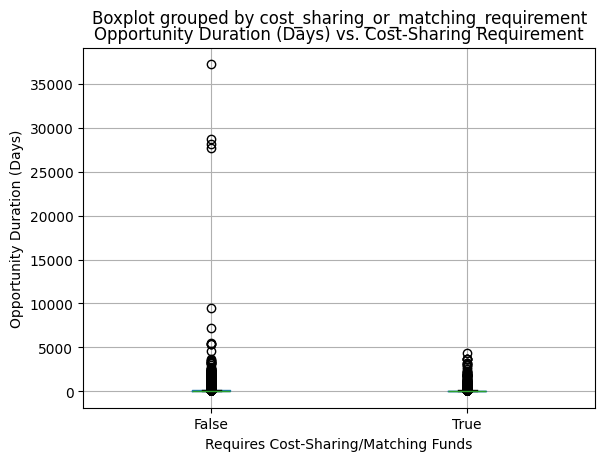

In [ ]:
#Use the new feature we have formed for our multivariate analysis by exploring the relationship between duration and cost sharing.
plt.figure(figsize=(10, 6))
df.boxplot(column='opportunity_duration_days', by='cost_sharing_or_matching_requirement', grid=True)
plt.title('Opportunity Duration (Days) vs. Cost-Sharing Requirement')
plt.xlabel('Requires Cost-Sharing/Matching Funds')
plt.ylabel('Opportunity Duration (Days)')
plt.grid(True)
plt.show()

In this section we prepare our data for spliting for our train and test sets but first, we will drop some more columns that we nolonger need ie post_date and close_data which we already used to extract a new feature. We dont have a use for it so we drop them.

Handling Missing Values
1. we impute the numerical columns with the median
2. impute categoricals with "Missing"
3. and lastly we impute the CFDA_numbers with mode.

Then we proceed to encode the categoricals, the bool target and then proceed to the data split. because we have a highly imbalanced data set unfortunately, we have to stratify Y so in that case, we control for the imbalance.

In [ ]:
numerical_cols = ['award_ceiling', 'award_floor', 'estimated_total_program_funding',
                  'expected_number_of_awards', 'opportunity_duration_days', 'update_lag_days']

for col in numerical_cols:
    df[col] = df[col].fillna(df[col].median())

categorical_cols = df.select_dtypes(include=['object']).columns

for col in categorical_cols:
    df[col] = df[col].fillna('Missing')

df['cfda_numbers'] = df['cfda_numbers'].fillna(df['cfda_numbers'].mode()[0])
print("Imputation complete. Null counts remaining:", df.isnull().sum().sum())

df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True, dtype=int)

le = LabelEncoder()
df_encoded['cost_sharing_or_matching_requirement'] = le.fit_transform(df_encoded['cost_sharing_or_matching_requirement'])

X = df_encoded.drop('cost_sharing_or_matching_requirement', axis=1)
y = df_encoded['cost_sharing_or_matching_requirement']

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.3,
    random_state=42,
    stratify=y
)

print("\n Final Results")
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train class balance:\n{y_train.value_counts(normalize=True).mul(100).round(2)}")
print(f"y_test class balance:\n{y_test.value_counts(normalize=True).mul(100).round(2)}")

Imputation complete. Null counts remaining: 0

 Final Results
X_train shape: (52948, 1397)
X_test shape: (22692, 1397)
y_train class balance:
cost_sharing_or_matching_requirement
0    83.48
1    16.52
Name: proportion, dtype: float64
y_test class balance:
cost_sharing_or_matching_requirement
0    83.48
1    16.52
Name: proportion, dtype: float64


Model development.
We will use two models today.
1. Logistic regression
2. Random Forest

In [ ]:
#Model 1 - Logistic Regression

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix
import json

print(f"Training data shape: {X_train.shape}")
print(f"Test data shape: {X_test.shape}")

log_reg = LogisticRegression(solver='liblinear', random_state=42, class_weight='balanced', max_iter=1000)
log_reg.fit(X_train, y_train)

y_pred_lr = log_reg.predict(X_test)
y_proba_lr = log_reg.predict_proba(X_test)[:, 1]

print("\n Logistic Regression Evaluation")
print(classification_report(y_test, y_pred_lr))
print(f"ROC-AUC Score: {roc_auc_score(y_test, y_proba_lr):.4f}")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_lr))

Training data shape: (52948, 1397)
Test data shape: (22692, 1397)

 Logistic Regression Evaluation
              precision    recall  f1-score   support

           0       0.79      0.02      0.05     18944
           1       0.16      0.97      0.28      3748

    accuracy                           0.18     22692
   macro avg       0.48      0.50      0.16     22692
weighted avg       0.68      0.18      0.09     22692

ROC-AUC Score: 0.6360
Confusion Matrix:
 [[  464 18480]
 [  126  3622]]


The ROC-AUC score measures the model's ability to distinguish between the positive and negative classes (in our case, grants that do require cost-sharing vs. those that do not). we employ it here because it is a crucial evaluation metric for classification models and also because we have a class that is highly imbalanced.

In [ ]:
# Model 2 - Random Forest

from sklearn.ensemble import RandomForestClassifier
import json


rf_clf = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
rf_clf.fit(X_train, y_train)

y_pred_rf = rf_clf.predict(X_test)
y_proba_rf = rf_clf.predict_proba(X_test)[:, 1]

print("\n Random Forest Evaluation")
print(classification_report(y_test, y_pred_rf))
print(f"ROC-AUC Score: {roc_auc_score(y_test, y_proba_rf):.4f}")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))


 Random Forest Evaluation
              precision    recall  f1-score   support

           0       0.93      0.98      0.95     18944
           1       0.85      0.63      0.73      3748

    accuracy                           0.92     22692
   macro avg       0.89      0.81      0.84     22692
weighted avg       0.92      0.92      0.92     22692

ROC-AUC Score: 0.9497
Confusion Matrix:
 [[18534   410]
 [ 1370  2378]]


In [ ]:
#Model Comparison

import json

results = {
    'Logistic Regression': {
        'Report': log_reg_report,
        'ROC_AUC': log_reg_roc_auc
    },
    'Random Forest': {
        'Report': rf_report,
        'ROC_AUC': rf_roc_auc
    }
}

comparison_data = []
for model_name, metrics in results.items():
    f1_score_positive = metrics['Report']['1']['f1-score']
    roc_auc = metrics['ROC_AUC']

    comparison_data.append({
        'Model': model_name,
        'F1-Score (Positive Class)': f1_score_positive,
        'ROC-AUC': roc_auc
    })

comparison_df = pd.DataFrame(comparison_data).set_index('Model')

print("\n Model Performance Comparison ")
print(comparison_df.sort_values(by='ROC-AUC', ascending=False))

best_model_name = comparison_df['ROC-AUC'].idxmax()


 Model Performance Comparison 
                     F1-Score (Positive Class)   ROC-AUC
Model                                                   
Random Forest                         0.727662  0.949651
Logistic Regression                   0.280232  0.636036


Model Performance Comparison:

Based on the evaluation metrics, the Random Forest model performed significantly better than the Logistic Regression model, particularly in its ability to correctly identify grants that do require cost-sharing (the positive class).

Random Forest:
1.   ROC-AUC: 0.9497 (Excellent discrimination ability)
2.   F1-Score (Positive Class): 0.7277 (Good balance between precision and recall for the positive class)
3. Confusion Matrix: Showed a much better true positive rate (correctly identifying grants requiring cost-sharing) compared to Logistic Regression.

Logistic Regression:
1. ROC-AUC: 0.6360 (Poor discrimination ability)
2. F1-Score (Positive Class): 0.2802 (Struggled to correctly identify grants requiring cost-sharing)
The Random Forest model is clearly the better choice for this prediction task.

In summary, the Random Forest model provides a strong predictive capability for identifying grants requiring cost-sharing, with the CFDA number, funding amounts, and duration being the most influential factors.